# (2) Data Analysis


In [ ]:
# comment out this cell if we want to see warnings
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# run next line if matplotlib_venn cannot be imported
# !pip install matplotlib-venn

In [1]:
from matplotlib_venn import venn2

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# load datasets
japanese = pd.read_csv('datasets/japanese.csv')
korean = pd.read_csv('datasets/korean.csv')

In [4]:
# check number of rows
japanese.shape, korean.shape

((995, 1), (976, 1))

## Number of words in each post

In [5]:
j_words = sorted([len(word_tokenize(i)) for i in japanese['post']],reverse=True)
k_words = sorted([len(word_tokenize(i)) for i in korean['post']],reverse=True)

# print top 5 in each list
print(f"Japanese Words: {j_words[:5]}")
print(f"Korean Words: {k_words[:5]}")

Japanese Words: [1921, 1118, 1006, 918, 757]
Korean Words: [2050, 930, 837, 826, 742]


In [6]:
# find mean and maximum number of words
print(" Japanese Words ".center(24, "="))
print(f"Mean: {round(np.mean(j_words),2)}, Maximum: {np.max(j_words)}")
print()
print(" Korean Words ".center(24, "="))
print(f"Mean: {round(np.mean(k_words),2)}, Maximum: {np.max(k_words)}")

==== Japanese Words ====
Mean: 91.53, Maximum: 1921

===== Korean Words =====
Mean: 70.17, Maximum: 2050


The posts on the Japanese subreddit are generally longer than the Korean subreddit although the Korean subreddit has one post that is extremely long.

In [7]:
# function to plot histograms
def plot_hist(j_data, k_data, item, upp_bound, bins=30):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    f.suptitle('Distributions of Number of '+item.title(), fontsize=20)
    ax1.hist(j_data, bins=bins, range=[0,upp_bound])
    ax1.set_title('Japanese Subreddit', fontsize=16)
    ax1.set_xlabel('Number of '+item.title())
    ax1.set_ylabel('Number of Posts')
    ax2.hist(k_data, bins=bins, range=[0,upp_bound])
    ax2.set_title('Korean Subreddit', fontsize=16)
    ax2.set_xlabel('Number of '+item.title())
    ax2.set_ylabel('Number of Posts')
    ax2.sharey(ax1);

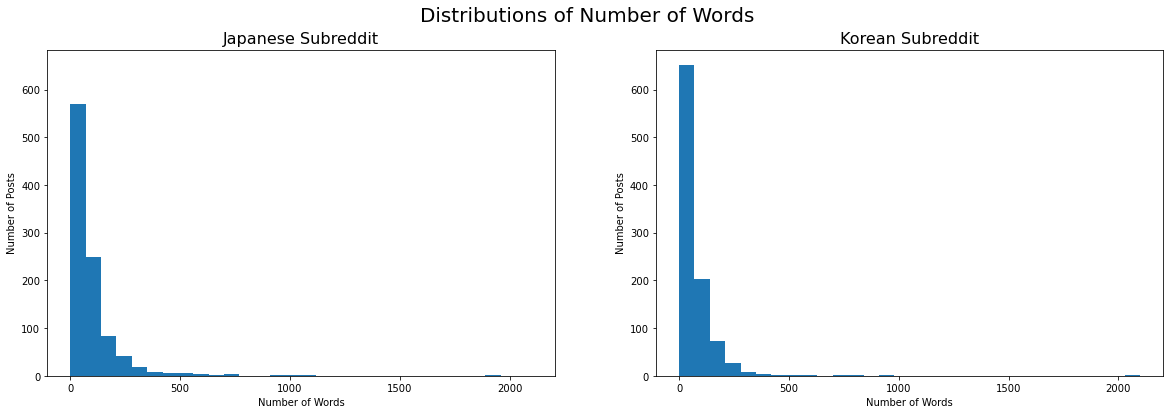

In [8]:
# plot histograms of number of words in subreddits
plot_hist(j_words, k_words, 'words', 2100)

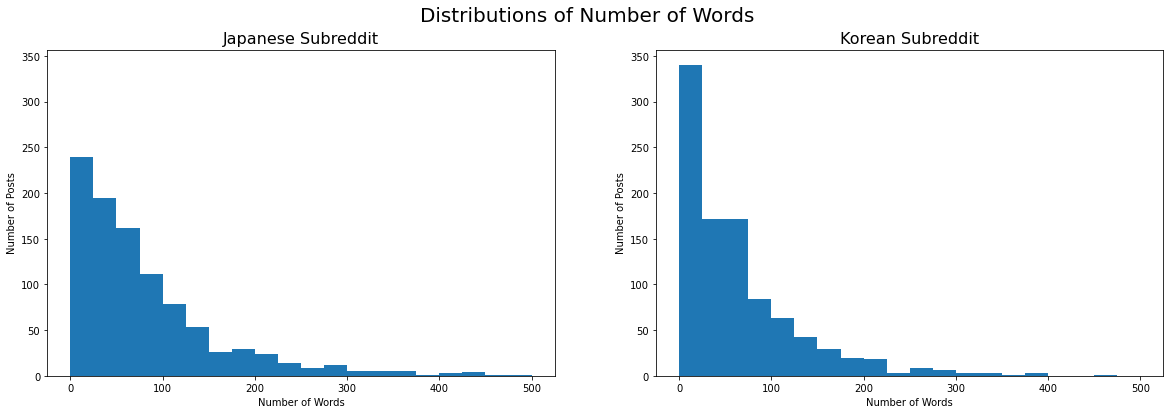

In [9]:
# plot histograms of number of words (limit to maximum 500) in subreddits
plot_hist(j_words, k_words, 'words', 500, bins=20)

The distributions of the number of words are very similar for both datasets, with the Korean subreddit having more posts that are shorter.

## Non-English Characters

In [10]:
# create tokenizer
non_english = RegexpTokenizer(r"[^\x00-\x7F]")

# create lists of number of non-english characters in each post
j_non_english = sorted([len(non_english.tokenize(i)) for i in japanese['post']], reverse=True)
k_non_english = sorted([len(non_english.tokenize(i)) for i in korean['post']], reverse=True)

# print top 5 in each list
print(f"Japanese Non-English Characters: {j_non_english[:5]}")
print(f"Korean Non-English Characters: {k_non_english[:5]}")

Japanese Non-English Characters: [392, 274, 242, 225, 195]
Korean Non-English Characters: [1079, 434, 425, 412, 396]


In [11]:
print(" Japanese Non-English ".center(26, "="))
print(f"Mean: {round(np.mean(j_non_english),2)}, Maximum: {np.max(j_non_english)}")
print()
print(" Korean Non-English ".center(26, "="))
print(f"Mean: {round(np.mean(k_non_english),2)}, Maximum: {np.max(k_non_english)}")

== Japanese Non-English ==
Mean: 6.16, Maximum: 392

=== Korean Non-English ===
Mean: 14.89, Maximum: 1079


The Korean subreddit has one post with extremely high number of non-English characters, and it also generally has more non-English characters than the Japanese subreddit.

In [12]:
print("Percentage of posts without non-English characters")
print(f"Japanese: {round(j_non_english.count(0) / len(j_non_english), 3)}")
print(f"Korean: {round(k_non_english.count(0) / len(k_non_english), 3)}")

Percentage of posts without non-English characters
Japanese: 0.733
Korean: 0.559


The Japanese subreddit has a larger proportion of posts that did not contain any non-English Characters at all compared to the Korean subreddit.

In [13]:
# remove zeroes
j_non_english_1 = [i for i in j_non_english if i != 0]
k_non_english_1 = [i for i in k_non_english if i != 0]

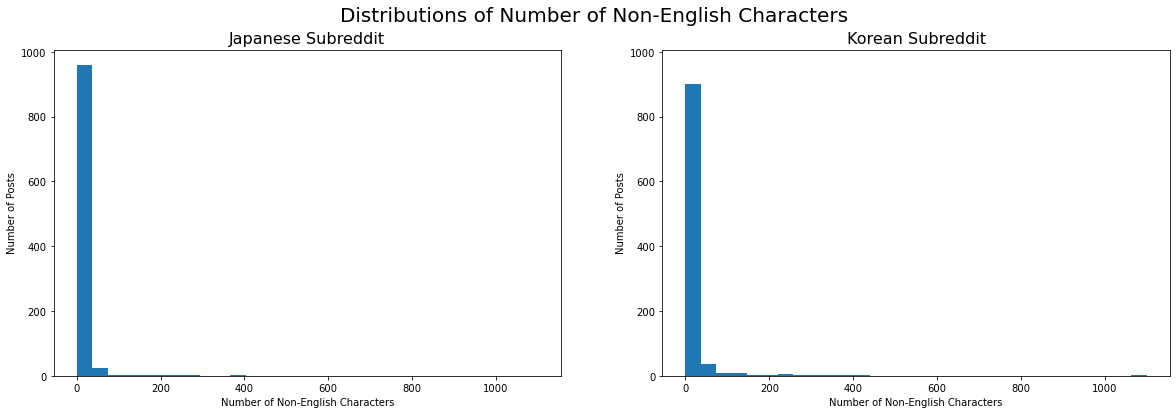

In [14]:
# plot histograms of number of non-english characters in subreddits
plot_hist(j_non_english, k_non_english, 'non-english characters', 1100)

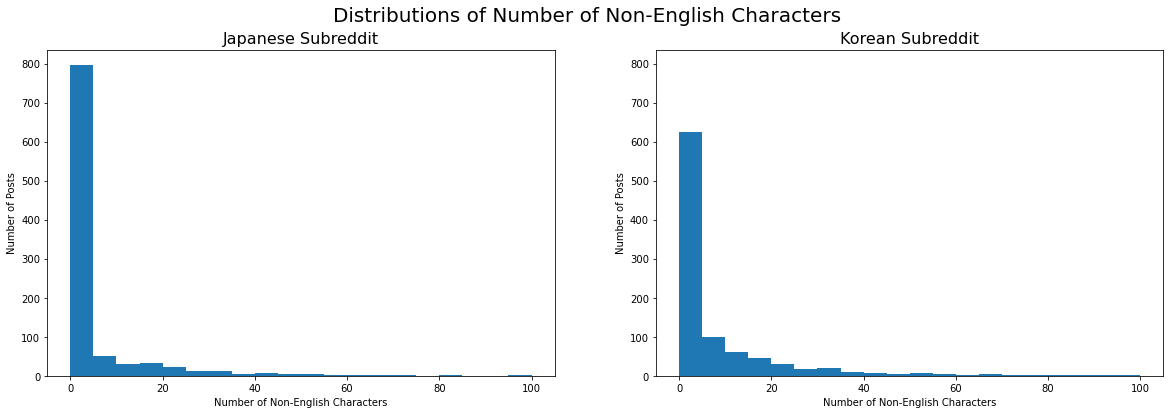

In [15]:
# plot histograms of number of non-english characters (limit to maximum 100) in subreddits
plot_hist(j_non_english, k_non_english, 'non-english characters', 100, bins=20)

The Japanese subreddit has more posts with a small number of non-English characters compared to the Korean subreddit.

### Conclusion on Posting Patterns
|Subreddit|Number of Words|Number of Non-English Characters|
|---|---|---|
|Japanese|More Words|Fewer non-English characters|
|Korean|Fewer Words|More non-English characters|

Posts on the Korean subreddit are generally shorter but have more non-English characters.

## Common Words Without Lemmatizing

In [16]:
# function to find common words
def find_common_words(corpus, ngram_range=(1,1), pp=None, sw=None, number_of_words=50):
    cvec = CountVectorizer(preprocessor=None, stop_words=sw, ngram_range=ngram_range)
    X_cvec = cvec.fit_transform(corpus)
    X_cvec_df = pd.DataFrame(X_cvec.todense(), columns=cvec.get_feature_names_out())
    common_words = X_cvec_df.sum().sort_values(ascending=False).head(number_of_words)
    return common_words

In [17]:
# function to plot bar charts
def plot_bar(j_data, k_data, title):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    f.suptitle(title.title(), fontsize=20)
    ax1.barh(j_data.index, j_data.values)
    ax1.set_title('Japanese Subreddit', fontsize=16)
    ax1.set_xlabel('Number of Occurrences')
    ax1.set_ylabel('Common Word')
    ax2.barh(k_data.index, k_data.values)
    ax2.set_title('Korean Subreddit', fontsize=16)
    ax2.set_xlabel('Number of Occurrences')
    ax2.set_ylabel('Common Word')
    ax2.sharex(ax1)
    plt.tight_layout();

### 1-grams

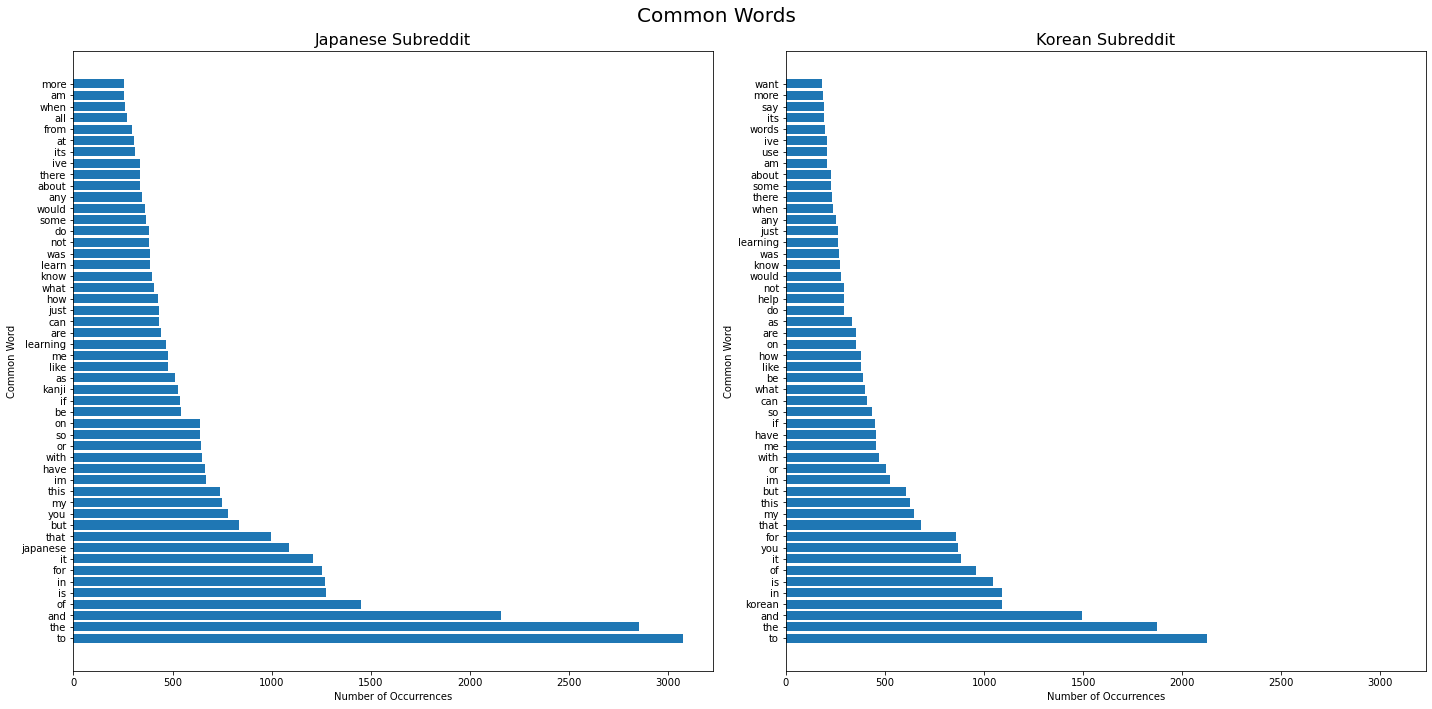

In [18]:
# common words in japanese and korean subreddit posts
j_common = find_common_words(japanese['post'])
k_common = find_common_words(korean['post'])

# plot bar charts
plot_bar(j_common, k_common, 'Common Words')

Most of the common words are in the standard English stopwords list, except for 'japanese' and 'korean'.

We remove these English stopwords as well as the keywords 'japanese' and 'korean', and look for other common words in the 2 subreddits.

In [19]:
# create stopword list with standard English stopwords and keywords 'japanese' and 'korean'
eng_jk = stopwords.words('english')+['japanese', 'korean']

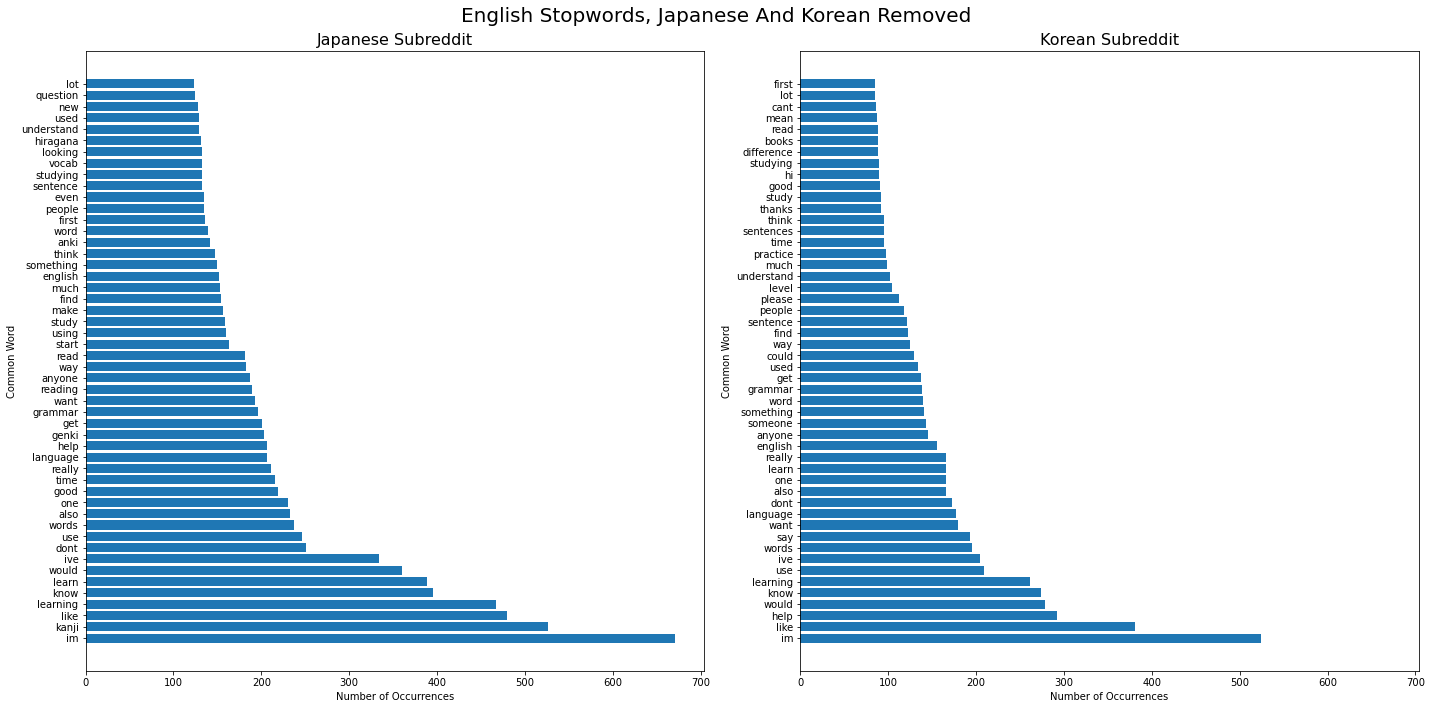

In [20]:
# common words in japanese and korean subreddit posts 
#after removing english stopwords and keywords 'japanese' and 'korean'
j_common_1 = find_common_words(japanese['post'], sw=eng_jk)
k_common_1 = find_common_words(korean['post'], sw=eng_jk)

# plot bar charts
plot_bar(j_common_1, k_common_1, 'English Stopwords, Japanese and Korean Removed')

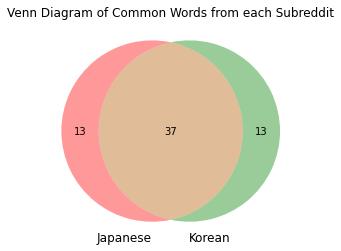

In [21]:
# plot venn diagram
plt.title("Venn Diagram of Common Words from each Subreddit")
venn2([set(j_common_1.index), set(k_common_1.index)], set_labels=('Japanese', 'Korean'));

The 74% of the common words in the subreddits overlap. The remaining 26% is may be useful for classifying our posts, and are investigated further.

In [52]:
# common words in japanese subreddit that are not in korean subreddit
j_only = sorted(set(j_common_1.index).difference(k_common_1.index))

# common words in korean subreddit that are not in japanese subreddit
k_only = sorted(set(k_common_1.index).difference(j_common_1.index))

# display in dataframe
pd.DataFrame([j_only, k_only], index=['japanese_only', 'korean_only']).T

,japanese_only,korean_only
0,anki,books
1,even,cant
2,genki,could
3,hiragana,difference
4,kanji,hi
5,looking,level
6,make,mean
7,new,please
8,question,practice
9,reading,say


### Insight from Differences in single words
Chinese characters is 'kanji' in Japanese and 'hanja' in Korean. We see that 'kanji' is a common word in the japanese subreddit but its equivalent 'hanja' is not a common word in the korean subreddit. For a potential learner who is not keen to pick up Chinese characters, Korean may be a better choice than Japanese, whereas the converse is true for a potential learner who already has strong background in the Chinese language.

### 2-grams

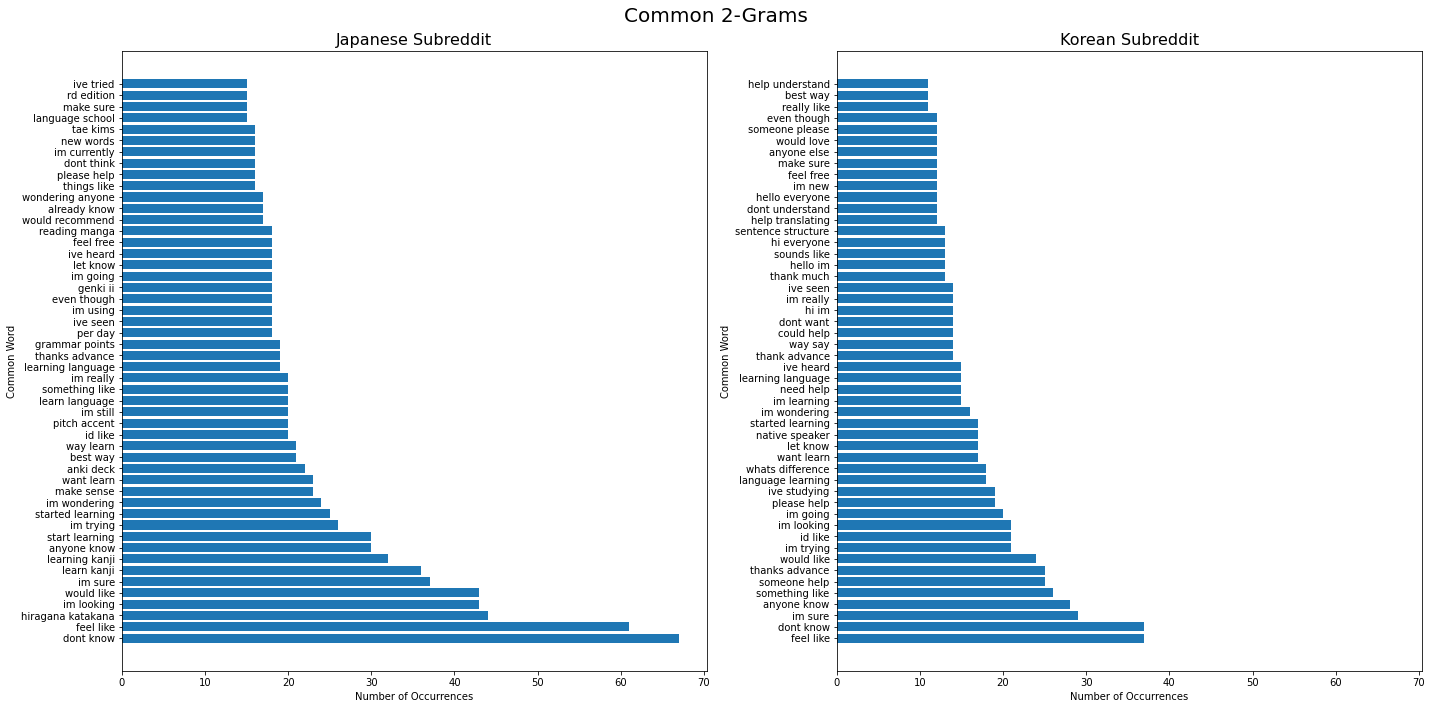

In [24]:
# common words in japanese and korean subreddit posts
j_common_2 = find_common_words(japanese['post'], ngram_range=(2,2), sw=eng_jk)
k_common_2 = find_common_words(korean['post'], ngram_range=(2,2), sw=eng_jk)

# plot bar charts
plot_bar(j_common_2, k_common_2, 'Common 2-Grams')

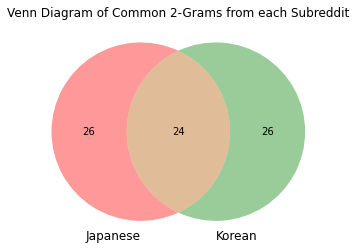

In [25]:
# plot venn diagram
plt.title("Venn Diagram of Common 2-Grams from each Subreddit")
venn2([set(j_common_2.index), set(k_common_2.index)], set_labels=('Japanese', 'Korean'));

The 2-grams are differ more between the subreddits, with less than half in common. These differences are likely to be more useful for classifying our posts, and are investigated further.

In [53]:
# common 2-grams in japanese subreddit that are not in korean subreddit
j_only_2 = set(j_common_2.index).difference(k_common_2.index)
# common 2-grams in korean subreddit that are not in japanese subreddit
k_only_2 = set(k_common_2.index).difference(j_common_2.index)

# display in dataframe
pd.DataFrame([j_only_2, k_only_2], index=['japanese_only_2', 'korean_only_2']).T

,japanese_only_2,korean_only_2
0,hiragana katakana,ive studying
1,way learn,im learning
2,wondering anyone,really like
3,things like,hi im
4,start learning,help understand
5,language school,would love
6,per day,someone help
7,dont think,whats difference
8,rd edition,anyone else
9,genki ii,native speaker


### Insights from Differences in 2-grams
The Japanese subreddit has frequent mention of 'pitch accent', indicating that pitch contours are important. For example, there are words in Japanese whose meaning change completely when the pitch contour is changed, such as 'a-me', which means 'rain' if the pitch goes high-low or 'candy' if the pitch goes low-high. Pitch accent is not prominent in Korean except certain dialects. For learners with some background in other languages with pitch accent such as Mandarin, Japanese is likely easier to pick up compared to someone with no background in such languages.

The Japanese subreddit mentions frequently the different writing forms 'hiragana', 'katakana' and 'kanji' whereas the Korean subreddit does not mention frequently its different writing forms 'hangul' and 'hanja', indicating that the Japanese subreddit likely has more serious learners who learn the proper Japanese writing instead of relying on the anglicized 'romaji'.

The Korean subreddit has mentions of words requesting help (e.g. 'someone help') and expressing thanks (e.g. 'thank advance'), indicating that it is often used for getting help, possibly for translation ('help translating') and perhaps for more beginner learners or new users ('im new', 'hello', 'hi'). In contrast, the Japanese subreddit appears to have more advanced learners ('already know', 'im using', 'ive tried').

In [28]:
# create a custom list of overlapping words
common_set = set(j_common_1.index).intersection(set(k_common_1.index))

When modelling, we compare using the standard English stopwords versus that with the common set added.

We also compare using another 2 lists with the obvious keywords 'japanese' and 'korean' removed.

## Common Words With Lemmatizing

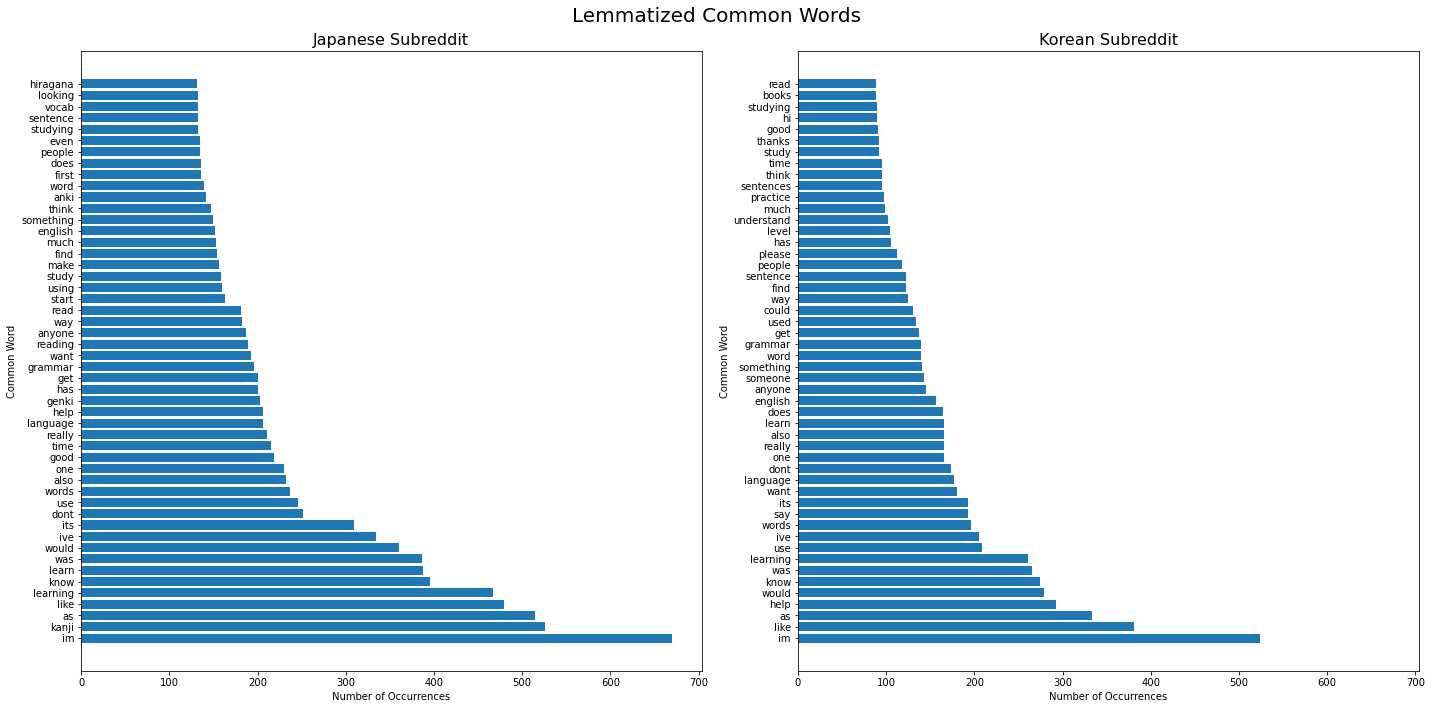

In [29]:
# create list of lemmatized english stopwords
eng_lem = [WordNetLemmatizer().lemmatize(i) for i in eng_jk]

# lemmatized common words in japanese and korean subreddit posts after removing english stopwords
j_common_lem = find_common_words(japanese['post'], pp=WordNetLemmatizer().lemmatize, sw=eng_lem)
k_common_lem = find_common_words(korean['post'], pp=WordNetLemmatizer().lemmatize, sw=eng_lem)

# plot bar charts
plot_bar(j_common_lem, k_common_lem, 'Lemmatized Common Words')

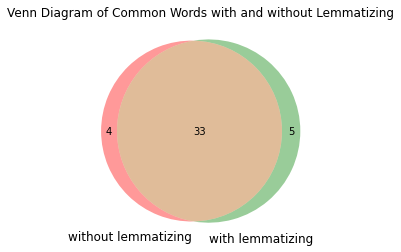

In [30]:
common_set_lem = set(j_common_lem.index).intersection(set(k_common_lem.index))

# plot venn diagram
plt.title("Venn Diagram of Common Words with and without Lemmatizing")
venn2([common_set,common_set_lem], set_labels=('without lemmatizing', 'with lemmatizing'));

The common words with or without lemmatizing are quite similar, with more than 85% of the words in the intersection. There may not be much utility from lemmatizing the data.

## Sentiment Analysis

In [31]:
# instantiate
sent = SentimentIntensityAnalyzer()

# create 2 lists of dictionaries
j_sent=[sent.polarity_scores(post) for post in japanese['post']]
k_sent=[sent.polarity_scores(post) for post in korean['post']]

In [32]:
# calculate average positive/negative sentiments across all posts
j_avg_pos = sum(i['pos'] for i in j_sent)/len(j_sent)
j_avg_neg = sum(i['neg'] for i in j_sent)/len(j_sent)
k_avg_pos = sum(i['pos'] for i in k_sent)/len(k_sent)
k_avg_neg = sum(i['neg'] for i in k_sent)/len(k_sent)

# calculate percentage of posts that are positive/negative
j_perc_pos = sum(1 for i in j_sent if i['compound'] > 0)/len(j_sent)
j_perc_neg = sum(1 for i in j_sent if i['compound'] < 0)/len(j_sent)
k_perc_pos = sum(1 for i in k_sent if i['compound'] > 0)/len(k_sent)
k_perc_neg = sum(1 for i in k_sent if i['compound'] < 0)/len(k_sent)

In [33]:
print(" Japanese ".center(47, '='))
print(f"Positive: Average is {round(j_avg_pos,3)}, Proportion is {round(j_perc_pos,3)}")
print(f"Negative: Average is {round(j_avg_neg,3)}, Proportion is {round(j_perc_neg,3)}")
print()
print(" Korean ".center(47, '='))
print(f"Positive: Average is {round(k_avg_pos,3)}, Proportion is {round(k_perc_pos,3)}")
print(f"Negative: Average is {round(k_avg_neg,3)}, Proportion is {round(k_perc_neg,3)}")

=================== Japanese ==================
Positive: Average is 0.116, Proportion is 0.686
Negative: Average is 0.037, Proportion is 0.156

==================== Korean ===================
Positive: Average is 0.12, Proportion is 0.643
Negative: Average is 0.031, Proportion is 0.12


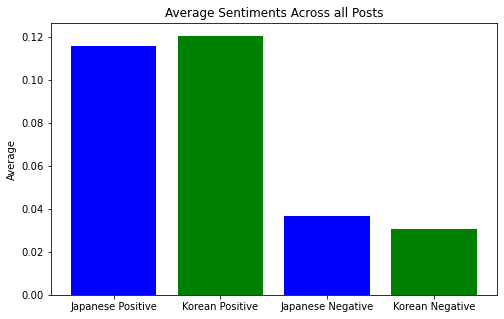

In [70]:
# plot percentage of posts with positive/negative sentiments on bar chart
plt.figure(figsize=(8,5))
plt.bar(['Japanese Positive', 'Korean Positive', 'Japanese Negative', 'Korean Negative'], 
        [j_avg_pos, k_avg_pos, j_avg_neg, k_avg_neg], color=['b', 'g', 'b', 'g'])
plt.ylabel('Average')
plt.title('Average Sentiments Across all Posts');

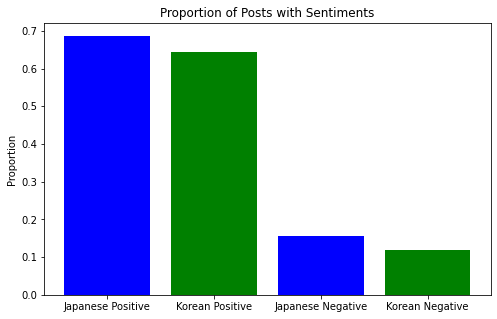

In [69]:
# plot average sentiments on bar chart
plt.figure(figsize=(8,5))
plt.bar(['Japanese Positive', 'Korean Positive', 'Japanese Negative', 'Korean Negative'], 
        [j_perc_pos, k_perc_pos, j_perc_neg, k_perc_neg], color=['b', 'g', 'b', 'g'])
plt.ylabel('Proportion')
plt.title('Proportion of Posts with Sentiments');

On average, the Korean posts are slightly more positive and less negative than the Japanese posts, though the Japanese subreddit has a higher proportion of both positive and negative posts (fewer neutral ones).

## Recommendations to Potential Learners
Japanese is more suitable for learners who
1) already can speak a language that has pitch accent or tones, such as Mandarin, Punjabi or Swedish;

2) have experience with or are interested in picking up logographic characters (Kanji) and not limit themselves to a phonologic writing system with a fixed set of alphabet.

Usage of the Korean subreddit is recommended for beginners, as the posts have fewer negative sentiments (thus may be more encouraging) and the words frequently used indicate a helpful environment, whereas usage of the Japanese subreddit may be more suitable for intermediate learners.

### Save Stopwords Lists to csv

In [34]:
# create custom stopwords list with standard english stopwords and common words
common_eng = list(common_set) + stopwords.words('english')
# create custom stopwords list with standard english stopwords, common words and 'japanese', 'korean'
common_eng_jk = common_eng + ['japanese', 'korean']

# create lemmatized versions of stopwords lists
eng_jk_lem = [WordNetLemmatizer().lemmatize(i) for i in eng_jk]
common_eng_lem = [WordNetLemmatizer().lemmatize(i) for i in common_eng]
common_eng_jk_lem = [WordNetLemmatizer().lemmatize(i) for i in common_eng_jk]

In [35]:
# save custom stopwords lists for modelling in next section.
pd.DataFrame([[eng_jk], [common_eng], [common_eng_jk], [eng_lem], 
              [eng_jk_lem], [common_eng_lem], [common_eng_jk_lem]], 
             index=['eng_jk', 'common_eng',  'common_eng_jk', 'eng_lem', 
                    'eng_jk_lem', 'common_eng_lem', 'common_eng_jk_lem'],
             columns=['list']
            ).to_csv('datasets/stopwords.csv')